## Customer Churn analysis 

UCI machine learning repositories dataset

The complete set of attributes is the following:

+ State: categorical, for the 50 states and the District of Columbia
+ Account length: integer-valued, how long an account has been active 
+ Area code: categorical
+ Phone number: customer ID
+ International Plan: binary feature, yes or no
+ VoiceMail Plan: binary feature, yes or no
+ Number of voice mail messages: integer-valued
+ Total day minutes: continuous, minutes customer used service during the day
+ Total day calls: integer-valued
+ Total day charge: continuous
+ Total evening minutes: continuous, minutes customer used service during the evening
+ Total evening calls: integer-valued
+ Total evening charge: continuous
+ Total night minutes: continuous, minutes customer used service during the night
+ Total night calls: integer-valued
+ Total night charge: continuous
+ Total international minutes: continuous, minutes customer used service to make international calls
+ Total international calls: integer-valued
+ Total international charge: continuous
+ Number of calls to customer service: integer-valued

In [5]:
from __future__ import division
import pandas as pd
import numpy as np

churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

print "Column names:"
print col_names

to_show = col_names[:6] + col_names[-6:]

print "\nSample data:"
churn_df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


In [14]:
#get target data
churn_target = churn_df['Churn?']
y = np.where(churn_target == 'True.',1,0) #Convert to boolean

churn_feat = churn_df.drop(['Phone','State','Churn?'], axis = 1)

In [13]:
churn_feat.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [15]:
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat[yes_no_cols] = churn_feat[yes_no_cols] == 'yes' #converts into boolean again

# Pull out features for future use
features = churn_feat.columns

X = churn_feat.as_matrix().astype(np.float)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


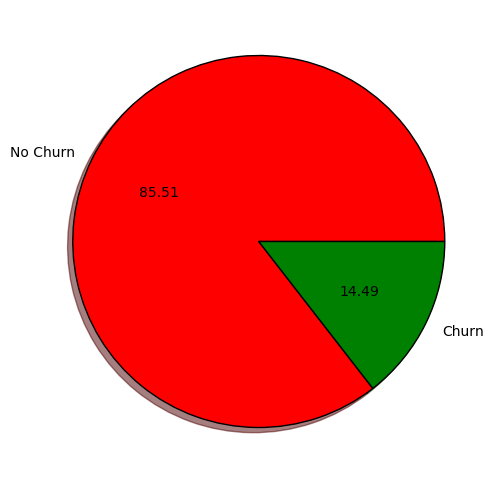

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)


In [17]:
#Save data for fun.
import pickle
ofname = open('churn_data.pkl', 'wb')
s = pickle.dump([X,y,features],ofname)
ofname.close()

In [19]:
#Retrieve data
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]

In [20]:
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import metrics

In [31]:
acc = np.zeros((5,))
i=0

kf=cross_validation.KFold(n=y.shape[0], n_folds=5, shuffle=False, random_state=0)
yhat=y.copy()
#fit and predict with k-1 folds of the data, to test on the remaning fold.
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(n_neighbors=1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print 'Mean accuracy: '+ str(np.mean(acc))

Mean accuracy: 0.810678444562


Its very bad. A naive model assigning not churn to every data point would have had better accuracy.

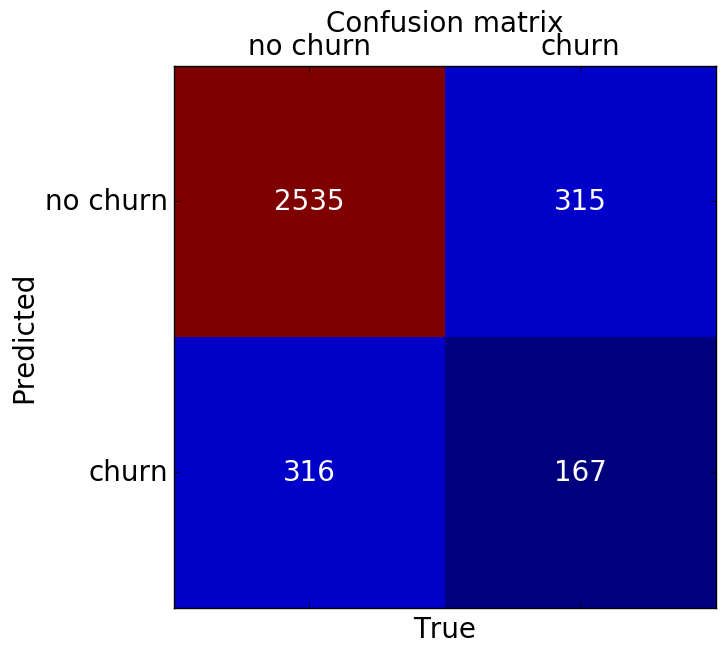

             precision    recall  f1-score   support

          0       0.89      0.89      0.89      2850
          1       0.35      0.35      0.35       483

avg / total       0.81      0.81      0.81      3333



In [35]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(yhat, y)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in xrange(2):
        for j in xrange(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])

print metrics.classification_report(y, yhat)

Really bad result. That is because we are operating with the euclidian topology on the features metric space. That translates to, a change of say '1' unit is equally important in all variables. On our problem this is specially not true. For example we do not expect a change from 0 to 1 in the feature VPlan (that is from true to false) to hold the same weight in influencing churn outcome that a change in 1 on account lenght, which in most cases would be almost not noticeable.

**FEATURE NORMALIZATION**: Standard way of scaling the features. Each feature is scalled to have 0 mean and unit standard deviation! 

In [37]:
#Nomrmalizate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = neighbors.KNeighborsClassifier(3)
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print 'Mean accuracy: '+ str(np.mean(acc))

Mean accuracy: 0.893489741616


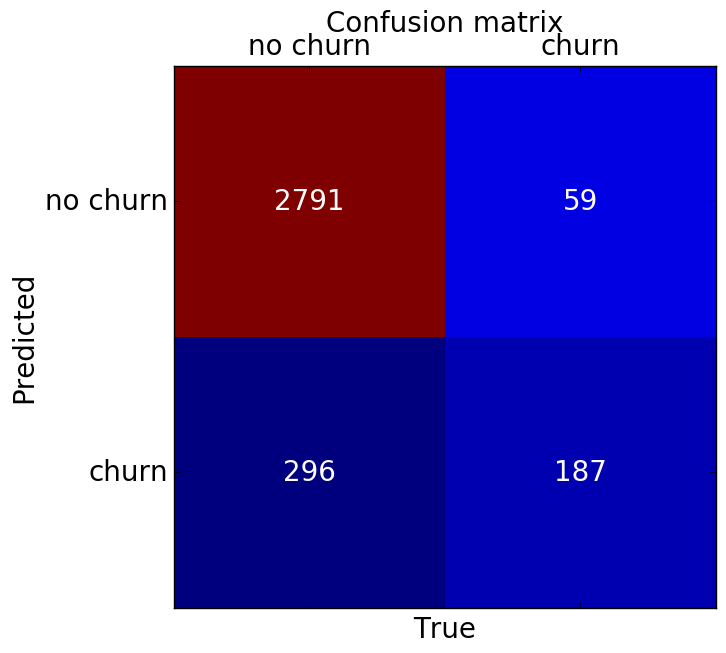

             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2850
          1       0.76      0.39      0.51       483

avg / total       0.88      0.89      0.88      3333



In [40]:
draw_confusion(y,yhat,['no churn', 'churn'])
print metrics.classification_report(y,yhat)